In [8]:
import pandas as pd

data = pd.read_csv('exams.csv')

def calculate_mark(score):
    if 82 <= score <= 100:
        return 5
    elif 65 <= score <= 81:
        return 4
    elif 45 <= score <= 64:
        return 3
    else:
        return 2

data['math mark'] = data['math score'].apply(calculate_mark)
data['reading mark'] = data['reading score'].apply(calculate_mark)
data['writing mark'] = data['writing score'].apply(calculate_mark)

data.to_csv('exams_with_marks.csv', index=False)

## Precision (Точность):
Точность измеряет, насколько точными оказались положительные прогнозы модели. В данном случае, это означает, насколько точно модель предсказывает каждую категорию оценок (2, 3, 4, 5).

Точность позволяет оценить, сколько из прогнозов модели действительно верных (правильных) с точки зрения каждой категории.

## Recall (Полнота):
Полнота измеряет способность модели выявлять все реальные положительные случаи. В вашем случае, это означает, насколько хорошо модель улавливает каждую категорию "оценок" среди всех фактических категорий.

Полнота позволяет оценить, сколько из всех реальных случаев каждой категории модель смогла правильно предсказать.

## F1-Score (F1-мера):
F1-Score представляет собой гармоническое среднее между точностью и полнотой. Она позволяет сбалансировать их, что особенно полезно, когда у нет явного предпочтения между точностью и полнотой.

F1-Score подходит для ситуаций, когда важно достичь хорошей точности и в то же время не упустить ни одного положительного случая.

              precision    recall  f1-score   support

           2       0.62      0.38      0.48        13
           3       0.75      0.76      0.76        76
           4       0.64      0.76      0.69        76
           5       0.71      0.49      0.58        35

    accuracy                           0.69       200
   macro avg       0.68      0.60      0.63       200
weighted avg       0.69      0.69      0.68       200

Mean Squared Error: 0.31


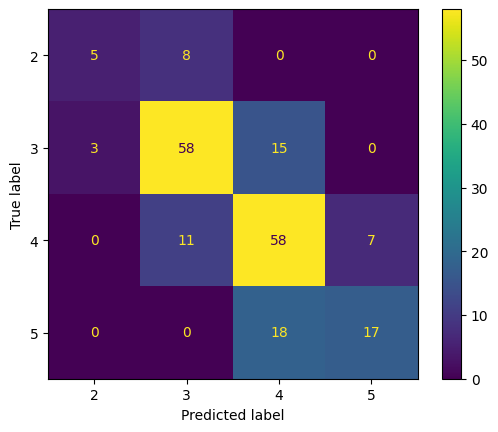

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('exams_with_marks.csv')

label_encoder = LabelEncoder()

# Encoding categorical variables
categorical_vars = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_vars:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(['math score', 'reading score', 'writing score', 'math mark'], axis=1)  # Features
y = data['math mark']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print(classification_report(y_test, predictions))

print("Mean Squared Error:", mse)

cm = confusion_matrix(y_test, predictions)
labels = sorted(y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

plt.show()